In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
folder_path = "imagenes_calibradas"

files = os.listdir(folder_path)

arrachera_files = [file for file in files if file.split('_')[1]=="A01"]
sirloin_files = [file for file in files if file.split('_')[1]=="S01"]
bola_files = [file for file in files if file.split('_')[1]=="B01"]

len(arrachera_files),len(sirloin_files),len(bola_files)

(30, 30, 30)

In [3]:
# Function for finding the circles in an image
def find_circles(paleta):
    gray = cv2.cvtColor(paleta, cv2.COLOR_RGB2GRAY)
    detected_circles = cv2.HoughCircles(gray, 
                        cv2.HOUGH_GRADIENT, 1, 20, param1 = 100,
                    param2 = 25, minRadius = 1, maxRadius = 25)

    if detected_circles is not None:
        # Convert the circle parameters a, b and r to integers.
        detected_circles = np.uint16(np.around(detected_circles))

    return detected_circles[0]

# Function for sorting the detected circles in the palette and getting the median of their colors
def getColorsMatrix(paleta,detected_circles):
    my_circles = deepcopy(detected_circles)
    circles_column_idx = np.argsort(my_circles[:,0])
    circ_sorted_x = deepcopy(my_circles[circles_column_idx,:])

    # First we split the circles array into 4 sections
    circ_split = np.array_split(circ_sorted_x,4)

    # Now we sort each section based on y coordinates
    circ_sorted_y = np.zeros_like(circ_split)
    for k in range(len(circ_split)):
        circles_row_idx = np.argsort(circ_split[k][:,1])
        circ_sorted_y[k] = deepcopy(circ_split[k][circles_row_idx,:])
    
    # And finally we reshape the array so it matches the median array
    rows,cols,_ = circ_sorted_y.shape
    my_circles = np.reshape(circ_sorted_y,(rows*cols,_))

    median_array = np.zeros((len(my_circles),3))
    for k in range(len(my_circles)):
        (x,y,r) = my_circles[k]
        
        median_r = np.median(paleta[y-(r//2):y+(r//2),x-(r//2):x+(r//2),0])
        median_g = np.median(paleta[y-(r//2):y+(r//2),x-(r//2):x+(r//2),1])
        median_b = np.median(paleta[y-(r//2):y+(r//2),x-(r//2):x+(r//2),2])
        
        median_array[k] = (median_r,median_g,median_b)
    
    return my_circles,median_array

In [4]:
medianas = np.zeros((24,30,3))
medianas

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

## Arrachera

In [5]:
for k,file in enumerate(arrachera_files):
    img = cv2.imread(folder_path+'/'+file,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    img_paleta = cv2.imread("paletas_calibradas/"+file,cv2.IMREAD_COLOR)
    img_paleta = cv2.cvtColor(img_paleta,cv2.COLOR_BGR2RGB)

    detected_circles = find_circles(img_paleta)

    # plt.figure()
    # plt.subplot(1,3,1)
    # plt.imshow(cv2.resize(img,(img.shape[1]*30//100,img.shape[0]*30//100)))
    # plt.subplot(1,3,2)
    # plt.imshow(img_paleta)
    
    if len(detected_circles) != 24:
        print("There are not 24 circles in the image")
        print(file)
        break

    # canvas = np.zeros_like(img_paleta)
    circles_p,median_p = getColorsMatrix(img_paleta,detected_circles)
    for j,color in enumerate(median_p):
        medianas[j][k] = color

    # for k in range(len(circles_p)):
    #     (x,y,r) = circles_p[k]
    #     color = median_p[k]
    #     cv2.circle(canvas,(x,y),r,color,-1)

    
    # plt.subplot(1,3,3)
    # plt.imshow(canvas)
    # plt.show()


In [14]:
vector = np.zeros((24,29,3))
for k in range(24):
    # print("Diferencias medias de los colores\n",np.average(np.abs(np.diff(medianas[k],axis=0)),axis=0))
    vector[k,:,:] = np.abs(np.diff(medianas[k],axis=0))
vector = vector.flatten()
# print("Promedio:",np.average(vector))

# plt.figure()
# plt.boxplot(vector)
# plt.show()


<built-in method tostring of numpy.ndarray object at 0x00000259048A6800>


## Sirloin

In [7]:
for file in sirloin_files:
    img = cv2.imread(folder_path+'/'+file,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    img_paleta = cv2.imread("paletas_calibradas/"+file,cv2.IMREAD_COLOR)
    img_paleta = cv2.cvtColor(img_paleta,cv2.COLOR_BGR2RGB)

    detected_circles = find_circles(img_paleta)

    # plt.figure()
    # plt.subplot(1,3,1)
    # plt.imshow(cv2.resize(img,(img.shape[1]*30//100,img.shape[0]*30//100)))
    # plt.subplot(1,3,2)
    # plt.imshow(img_paleta)
    
    if len(detected_circles) != 24:
        print("There are not 24 circles in the image")
        print(file)
        break

    # canvas = np.zeros_like(img_paleta)
    circles_p,median_p = getColorsMatrix(img_paleta,detected_circles)
    for j,color in enumerate(median_p):
        medianas[j][k] = color
    # for k in range(len(circles_p)):
    #     (x,y,r) = circles_p[k]
    #     color = median_p[k]
    #     cv2.circle(canvas,(x,y),r,color,-1)

    
    # plt.subplot(1,3,3)
    # plt.imshow(canvas)
    # plt.show()

Promedio: 6.988266283524904


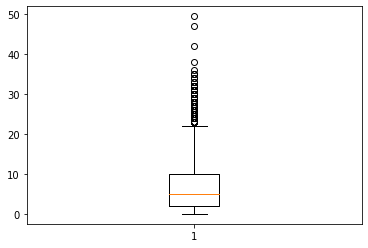

In [8]:
vector = np.zeros((24,29,3))
for k in range(24):
    # print("Diferencias medias de los colores\n",np.average(np.abs(np.diff(medianas[k],axis=0)),axis=0))
    vector[k,:,:] = np.abs(np.diff(medianas[k],axis=0))
vector = vector.flatten()
print("Promedio:",np.average(vector))

plt.figure()
plt.boxplot(vector)
plt.show()

## Bola

In [9]:
for file in bola_files:
    img = cv2.imread(folder_path+'/'+file,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    img_paleta = cv2.imread("paletas_calibradas/"+file,cv2.IMREAD_COLOR)
    img_paleta = cv2.cvtColor(img_paleta,cv2.COLOR_BGR2RGB)

    detected_circles = find_circles(img_paleta)

    # plt.figure()
    # plt.subplot(1,3,1)
    # plt.imshow(cv2.resize(img,(img.shape[1]*30//100,img.shape[0]*30//100)))
    # plt.subplot(1,3,2)
    # plt.imshow(img_paleta)
    
    if len(detected_circles) != 24:
        print("There are not 24 circles in the image")
        print(file)
        break

    # canvas = np.zeros_like(img_paleta)
    circles_p,median_p = getColorsMatrix(img_paleta,detected_circles)
    for j,color in enumerate(median_p):
        medianas[j][k] = color
    # for k in range(len(circles_p)):
    #     (x,y,r) = circles_p[k]
    #     color = median_p[k]
    #     cv2.circle(canvas,(x,y),r,color,-1)

    
    # plt.subplot(1,3,3)
    # plt.imshow(canvas)
    # plt.show()

Promedio: 6.897749042145594


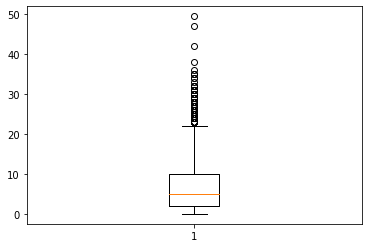

In [10]:
vector = np.zeros((24,29,3))
for k in range(24):
    # print("Diferencias medias de los colores\n",np.average(np.abs(np.diff(medianas[k],axis=0)),axis=0))
    vector[k,:,:] = np.abs(np.diff(medianas[k],axis=0))
vector = vector.flatten()
print("Promedio:",np.average(vector))

plt.figure()
plt.boxplot(vector)
plt.show()